In [146]:
import pandas as pd
import numpy as np

In [147]:
loans = pd.read_csv('lending-club-data.csv')

/home/malav/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [148]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',axis=1)

In [149]:
safe_l = sum(np.where(loans['safe_loans']==1))
print("Percentage of safe loan",(len(safe_l)/loans.shape[0])*100)

risky_l = sum(np.where(loans['safe_loans']!=1))
print("Percentage of risky loan",(len(risky_l)/loans.shape[0])*100)

Percentage of safe loan 81.11853319957262
Percentage of risky loan 18.881466800427383


In [150]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [151]:
train_idx = pd.read_json('module-5-assignment-1-train-idx.json')
validation_idx = pd.read_json('module-5-assignment-1-validation-idx.json')

In [152]:
train_data = loans.iloc[train_idx[0]]
validation_data = loans.iloc[validation_idx[0]]

In [153]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]
print( "Number of safe loans  : %s" % len(safe_loans_raw))
print( "Number of risky loans : %s" % len(risky_loans_raw))

Number of safe loans  : 99457
Number of risky loans : 23150


In [154]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))

risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac=percentage)

# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [155]:
percentage

0.2327639080205516

In [156]:
print( "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data)))
print( "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data)))
print( "Total number of loans in our new dataset :", len(loans_data))

Percentage of safe loans                 : 0.5
Percentage of risky loans                : 0.5
Total number of loans in our new dataset : 46300


In [157]:
loans = pd.get_dummies(loans)

In [158]:
loans

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0,11,27.65,1,1,83.7,0.00,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.00,1,1,9.4,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,11,8.72,1,1,98.5,0.00,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,11,20.00,0,1,21.0,16.97,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,4,11.20,1,1,28.3,0.00,1,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,1,0,1.50,0,0,14.6,0.00,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
122603,0,11,11.26,0,0,15.2,0.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
122604,0,6,12.28,0,0,10.7,0.00,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
122605,0,11,18.45,1,1,46.3,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [159]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [160]:
train_data = pd.get_dummies(train_data)
validation_data = pd.get_dummies(train_data)

In [161]:
train_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
1,1,1,1.00,1,1,9.4,0.0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,5,5.55,1,1,32.6,0.0,-1,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,1,18.08,1,1,36.5,0.0,-1,0,1,...,0,0,0,0,1,0,0,0,0,1
10,1,1,10.08,1,1,91.7,0.0,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
12,0,4,7.06,1,1,55.5,0.0,-1,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122572,1,1,8.94,0,1,41.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
122575,0,6,13.58,0,1,76.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
122588,0,4,7.57,1,1,34.4,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
122599,0,11,26.27,0,0,94.1,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [162]:
output_train=train_data['safe_loans']
ft=train_data.columns
ft=ft.drop('safe_loans')

In [163]:
decision_tree_model=tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(train_data[ft],output_train)

DecisionTreeClassifier(max_depth=6)

In [164]:
small_model = tree.DecisionTreeClassifier(max_depth=2)
small_model.fit(train_data[ft],output_train)

DecisionTreeClassifier(max_depth=2)

In [165]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
22,0,3,29.44,1,1,93.9,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
26,1,1,12.19,1,1,59.1,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.00,1,1,9.4,0.0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,5,5.55,1,1,32.6,0.0,-1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [166]:
cols = [col for col in sample_validation_data if col != 'safe_loans']+['safe_loans']
sample_validation_data = sample_validation_data[cols]

In [167]:
decision_tree_model.predict(sample_validation_data.iloc[:,:-1])

array([-1,  1, -1, -1])

In [168]:
decision_tree_model.predict_proba(sample_validation_data.iloc[:,:-1])

array([[0.57971014, 0.42028986],
       [0.34156543, 0.65843457],
       [0.54036024, 0.45963976],
       [0.64750958, 0.35249042]])

In [169]:
small_model.predict(sample_validation_data.iloc[:,:-1])

array([ 1,  1, -1, -1])

In [170]:
small_model.predict_proba(sample_validation_data.iloc[:,:-1])

array([[0.41896585, 0.58103415],
       [0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661]])

In [171]:
sample_validation_data[target]

22    1
26    1
1    -1
6    -1
Name: safe_loans, dtype: int64

In [172]:
import graphviz

In [173]:
dot_data=tree.export_graphviz(small_model,out_file=None,feature_names=train_data[ft].columns,rounded=True)

In [174]:
graph=graphviz.Source(dot_data)

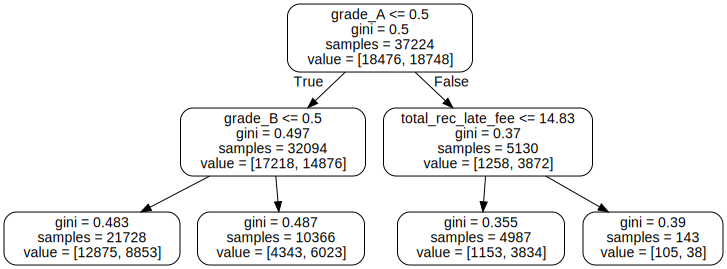

In [175]:
graph

In [176]:
decision_tree_model.score(train_data[ft],output_train)

0.6405276165914464

In [177]:
small_model.score(train_data[ft],output_train)

0.6135020416935311

In [181]:
output_valid=validation_data['safe_loans']
ftv=validation_data.columns
ftv=ftv.drop('safe_loans')
ftv.shape

(67,)

In [183]:
decision_tree_model.score(validation_data[ftv],output_valid)

0.6405276165914464

In [184]:
small_model.score(validation_data[ftv],output_valid)

0.6135020416935311

In [185]:
big_model=tree.DecisionTreeClassifier(max_depth=10)
big_model.fit(train_data[ft],output_train)
big_model.score(train_data[ft],output_train)

0.6637921770900495

In [186]:
big_model.score(validation_data[ftv],output_valid)

0.6637921770900495